# Elbow Method

**Here, Elbow Method is implemented by plotting inertia against the number of clusters to choose an optimal value for K.**

The csv file containing the dataset details is uploaded and converted to a dataframe and the necessary libraries are imported. 

In [1]:
import pandas as pd
import os
os.chdir('D:/Down') #Replace the location to where the output.csv file is stored.
df = pd.read_csv('output.csv')
print(df)

                    Folder       GT_ID  \
0      1001001651711238293  X002SQZ6NB   
1      1001001651777963872  B01N9SPQHQ   
2      1001001652099684534  B01N36TLCZ   
3      1001001652120609820  X00337RSM1   
4      1001001652136995339  X0034B0XFF   
...                    ...         ...   
49995  3025001656050969923  X002IVRFA3   
49996  3025001656459437376  X0026HW3ZB   
49997  3025001656485663471  X002CC129D   
49998  3025001656505807605  B07CTM9755   
49999  3025001656567353774  X002VTR845   

                                               Container  \
0      100Pcs Disposable Face Masks, Black Face Mask,...   
1      La Roche-Posay Toleriane Double Repair Face Mo...   
2      Sesame Street Assorted Round Paper Plates - 7"...   
3      Keds womens No-slip Liner Socks, 3 and 5 Pair ...   
4      Kids Headphones for School - Girls Boys Teens ...   
...                                                  ...   
49995  PRETTYGARDEN Women's Loose Solid Off Shoulder ...   
49996  5 Pack R

In [3]:
import numpy as np #import necessary libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


**The folders are iterated and the PickRGB image file is used. If it is not present, any other JPG file is uploaded. The images are resized. If the processed images and labels already exist, these are uploaded. If they are not present, they are saved to disk.**

In [4]:
import os
from skimage.io import imread, imsave
from skimage.transform import resize
from tqdm import tqdm
import time
import numpy as np
import pandas as pd

def load_images(image_dir, df, target_size=(64, 64), num_images=50000, save_dir=None): #load and preprocess images to a size of 64x64
    image_list = []
    labels = []
    count = 0  

    folder_names = sorted(os.listdir(image_dir))

    if save_dir:
        images_filename = os.path.join(save_dir, "images.npy")
        labels_filename = os.path.join(save_dir, "labels.npy")

        if os.path.exists(images_filename) and os.path.exists(labels_filename):
            print("Loading images and labels from saved files...")
            image_list = np.load(images_filename, allow_pickle=True)
            labels = np.load(labels_filename, allow_pickle=True)
            return image_list, labels

    progress_bar = tqdm(total=num_images, desc="Loading images", unit="image")

    start_time = time.time() 

    for folder_name in folder_names:
        folder_path = os.path.join(image_dir, folder_name)

        if os.path.isdir(folder_path):
            image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')] #only jpg files from the folders are uploaded

            if len(image_files) > 0:
                pick_rgb_file = os.path.join(folder_path, "PickRGB.jpg") #Among the jpg files, PickRGB file is chosen if it is present
                image_file = pick_rgb_file if os.path.exists(pick_rgb_file) else image_files[0] #Else any other jpg file is chosen

                image_path = os.path.join(folder_path, image_file)
                img = imread(image_path)
                img = resize(img, target_size, mode='reflect')
                image_list.append(img)
                labels.append(df.loc[count, 'Container']) 
                count += 1

    
                progress_bar.update(1)

                if count == num_images:
               
                    progress_bar.close()

             
                    if save_dir:
                        print("Saving images and labels...")
                        os.makedirs(save_dir, exist_ok=True)
                        np.save(os.path.join(save_dir, "images.npy"), np.array(image_list))
                        np.save(os.path.join(save_dir, "labels.npy"), np.array(labels))

                  
                    elapsed_time = time.time() - start_time
                    time_per_image = elapsed_time / num_images
                    time_left = (num_images - count) * time_per_image
                    print(f"Time left: {time_left:.2f} seconds")

                    return np.array(image_list), labels


    progress_bar.close()


    if save_dir:
        print("Saving images and labels...")
        os.makedirs(save_dir, exist_ok=True)
        np.save(os.path.join(save_dir, "images.npy"), np.array(image_list)) #save the preprocessed images and labels
        np.save(os.path.join(save_dir, "labels.npy"), np.array(labels))


    elapsed_time = time.time() - start_time
    time_per_image = elapsed_time / count
    time_left = (num_images - count) * time_per_image
    print(f"Time left: {time_left:.2f} seconds")

    return np.array(image_list), labels


C:\Users\sahre\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:

image_dir = 'D:/Down/armbench-object-id-0.1/Picks'
save_dir = 'D:/Down/processedimages'  
images, labels = load_images(image_dir, df, num_images=50000, save_dir=save_dir) #load 50000 images and labels




Loading images: 100%|███████████████████████████████████████████████████████| 50000/50000 [1:13:16<00:00, 11.37image/s]


Saving images and labels...
Time left: 0.00 seconds


In [4]:
def load_saved_images_labels(load_dir):
    images_filename = os.path.join(load_dir, "images.npy")
    labels_filename = os.path.join(load_dir, "labels.npy")

    image_list = np.load(images_filename, allow_pickle=True)
    labels = np.load(labels_filename, allow_pickle=True)

    return image_list, labels


load_dir = 'D:/Down/processedimages'
images, labels = load_saved_images_labels(load_dir)

The Elbow Method function is defined. Inertia is stored in a list for every value of K (from 1 to 30) when applying K-means and is plotted against the Number of Clusters

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

def elbow_method(data, max_clusters): #The elbow method is defined
    inertias = []
    
    flattened_images = data.reshape(data.shape[0], -1)

    for k in tqdm(range(1, max_clusters + 1), desc="Clustering", unit="cluster"): #Inertia is stored in a list for different numbers of clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(flattened_images)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6)) #The graph is plotted
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()



Clustering:   0%|                                                                          | 0/30 [00:00<?, ?cluster/s]C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Clustering:   3%|██▏                                                               | 1/30 [00:15<07:29, 15.50s/cluster]C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Clustering:   7%|████▍                                                             | 2/30 [01:42<26:50, 57.52s/cluster]C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

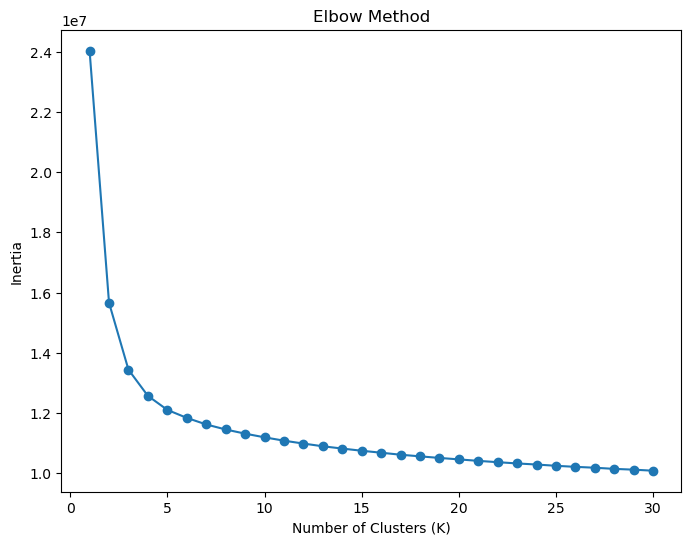

In [15]:

max_clusters = 30
elbow_method(images, max_clusters)


Based on the graph obtained, the Elbow is found at 4 clusters. Therefore, K-means is implemented with a value of 4 and random 10 images from each cluster are visualised.

In [5]:
from sklearn.cluster import KMeans

def kmeans(images, num_clusters): #K-means method is defined 
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    flattened_images = images.reshape(images.shape[0], -1)

    cluster_assignments = kmeans.fit_predict(flattened_images)

    return cluster_assignments




In [23]:
num_clusters = 4 
cluster_assignments = kmeans(images, num_clusters) #4 clusters are chosen 


C:\Users\sahre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\sahre\AppData\Local\Temp\ipykernel_5836\2910497370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Label"] = cluster_assignments


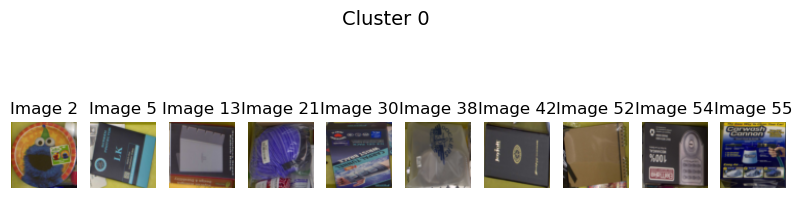

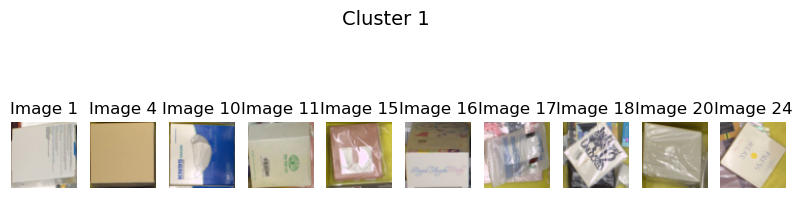

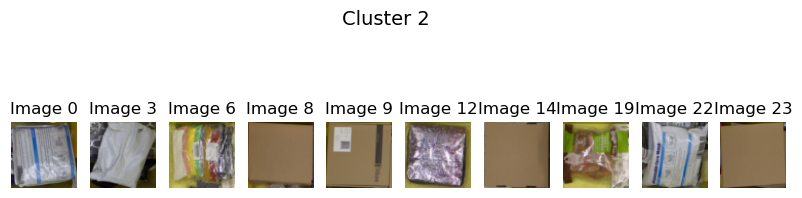

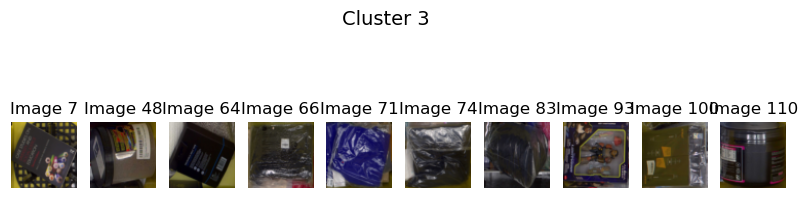

In [20]:
import matplotlib.pyplot as plt

df2 = df.head(50000)
df2["Label"] = cluster_assignments #Cluster assignments are added to a new column called Label in the dataframe

num_images_per_cluster = 10 #10 images per each cluster are visualised
for cluster_num in range(4):
    images_in_cluster = df2[df2["Label"] == cluster_num].index[:num_images_per_cluster]

    plt.figure(figsize=(10, 3))
    for i, image_idx in enumerate(images_in_cluster):
        plt.subplot(1, num_images_per_cluster, i + 1)
        plt.imshow(images[image_idx])
        plt.title(f"Image {image_idx}")
        plt.axis("off")
    plt.suptitle(f"Cluster {cluster_num}", fontsize=14)
    plt.show()
